<a href="https://colab.research.google.com/github/Didier06/IA_licence_pro_chimie/blob/main/reseaux_neurones/IA_exo_reseau_2classes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Génération de 2 classes de points
* NbbPoints - nombre total de points à générer.
* Chaque point a 3 caractéristiques : x, y, et type de classe  (0 pour la première classe et 1 pour la deuxième).

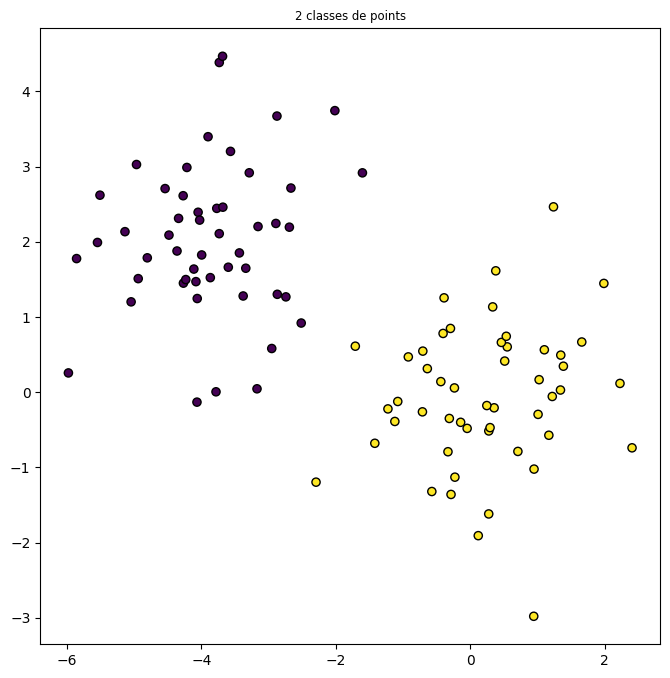

In [1]:
import matplotlib.pyplot as plt
#from pandas import DataFrame as df
from sklearn.datasets import make_blobs, make_classification, make_gaussian_quantiles

plt.figure(figsize=(8, 8))
#plt.subplots_adjust(bottom=0.05, top=0.9, left=0.05, right=0.95)
Nb_points = 100
plt.subplot(111)
plt.title("2 classes de points", fontsize="small")
centers = [(-4, 2), (0, 0)] # centre des classes
# création des 2 classes
X1, Y1 = make_blobs(n_samples = Nb_points, cluster_std= 1, n_features=2, centers=centers, random_state=10)
# X1 contient les coordonnées x,y de chaque popint et Y1 est la classe des points 0 : 1ère classe  et 1 2ème classe
#print(X1)
#print(Y1)

# Xe et Xs sont dans un premier temps les entrées et sorties du réseau
Xe = X1[:,0] # entrée x
Xs = X1[:,1] # entrée y
#print(Xe)
#print()

# tracé des points sur le graphe avec  leur étiquette correspondante en couleur
plt.scatter(X1[:, 0], X1[:, 1], marker="o",c=Y1, s=35, edgecolor="k")
plt.show()

# Création du réseau séquentiel avec des fonctions d'activation identité (linéaire)

In [2]:
from keras.models import Sequential
from keras.layers import Activation, Dense
from keras import initializers
from keras.optimizers import SGD, Adam
import numpy as np

#my_init = initializers.Zeros()
my_init = initializers.Ones()
#my_init = initializers.RandomUniform(minval=0.0, maxval=1.0)
#normalizer = preprocessing.Normalization()
model=Sequential()
#pour La couche d'entrée, input_shape doit être égale à 1 + couche 3 neurones units = 3
model.add(Dense(units=1,input_shape=[1],activation= 'linear',kernel_initializer = my_init))
# créer ici votre réseau de neurones avec une couche et un neurone avec une entrée Xe et la sortie Xs
#model.add(Dense(units=1, activation='linear'))
#Création de l'optimiseur ("adam "alternatif à "sgd")
#opt = SGD(lr=0.01) #w = w - learning_rate * g
opt = Adam(learning_rate=0.01)
hist = model.compile(loss='mean_squared_error',optimizer=opt,  metrics=['mse'])
entree = Xe
sortie = Xs

#Entraînement du réseau 1000 passages (1000 époques)
model.fit(x=entree,y=sortie,epochs=100)

#Affichage des poids
print("")
print("Weights: \n")
print(model.get_weights())

#Prédire les nombres
liste_x= np.linspace(-6,2, num =50)
xe = np.array([[x] for x in liste_x])
prediction = model.predict(xe)

# on obtient une régression linéaire ! on n'a pas séparé les classes de 2 points !

Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 19.2300 - mse: 19.2300
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 19.3989 - mse: 19.3989 
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 16.0990 - mse: 16.0990
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 15.1520 - mse: 15.1520
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 14.2171 - mse: 14.2171 
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 13.9912 - mse: 13.9912
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 13.4462 - mse: 13.4462
Epoch 8/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 11.2306 - mse: 11.2306
Epoch 9/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 10.8982 - mse: 10.8982
Epoch 10/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 10.5395 - mse: 10.5395
Epoch 11/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 9.3733 - mse: 9.3733
Epoch 12/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 8.6902 - mse: 8.6902
Epoch 13/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0

# Retraçons les points et le droite obtenue :

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8 (36.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 6 (28.00 B)

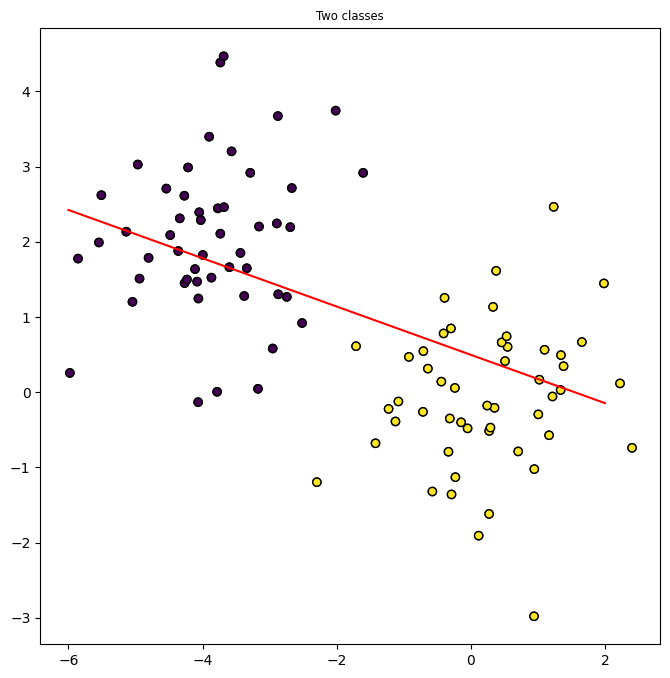

In [3]:
import matplotlib.pyplot as plt
#from pandas import DataFrame as df
from sklearn.datasets import make_blobs, make_classification, make_gaussian_quantiles

plt.figure(figsize=(8, 8))
#plt.subplots_adjust(bottom=0.05, top=0.9, left=0.05, right=0.95)
Nb_points = 100
plt.subplot(111)
plt.title("Two classes", fontsize="small")
centers = [(-4, 2), (0, 0)]
X1, Y1 = make_blobs(n_samples = Nb_points, cluster_std= 1, n_features=2, centers=centers, random_state=10,center_box=(-10.0, 10.0))

Xe = X1[:,0]
Xs = X1[:,1]

plt.scatter(X1[:, 0], X1[:, 1], marker="o",c=Y1, s=35, edgecolor="k")

plt.scatter(X1[:, 0], X1[:, 1], marker="o",c=Y1, s=35, edgecolor="k")
plt.plot(liste_x,prediction,color = 'r')
model.summary()
plt.show()
plt.show()


# Comment modifier le réseau de neurones pour séparer les 2 classes ?

* Maintenant les données d'entrée sont de dimension 2, en entrée on met x et y c'est à dire X1
* Le réseau comporte une seule couche d'entrée comportant un seul neurone. La fonction d'activation est la fonction sigmoide.
* En sortie (output) on met la classe de Y1 dimension 1.


In [11]:
from keras.models import Sequential
from keras.layers import Activation, Dense
from keras import initializers
from keras.optimizers import SGD, Adam
import numpy as np

#my_init = initializers.Zeros()
my_init = initializers.Ones()
#my_init = initializers.RandomUniform(minval=0.0, maxval=1.0)

model=Sequential()
#pour La couche d'entrée, input_shape vaut : 2  (car on a 2 features: x et y), pas de normalisation nécessaire
model.add(Dense(units=1,input_shape=[1],activation= 'sigmoid',kernel_initializer = my_init))

#Création du réseau ("adam "alternatif à "sgd")
#opt = SGD(lr=0.01) #w = w - learning_rate * g
opt = Adam(learning_rate=0.01)
hist = model.compile(loss='mean_squared_error',optimizer=opt,  metrics=['accuracy']) # on compile mais on sauve l'historique d'apprentissage du réseau
# on pourra comme ça tracer les graphiques d'évolution des pertes et de la précision.

# entrée X1 de dimension 2 (x, y)
#entree = X1
# sortie de dimension  1 (classe bipolaire)
#sortie = Y1

entree = X1[:,0]
sortie = X1[:,1]
#Entraînement du réseau 100 passages
hist = model.fit(x=entree,y=sortie,epochs=100)

#Print weights
print("")
print("Weights: \n")
print(model.get_weights())

#Prédire l'appartenance de points à un classe :
#print(X1)
A= np.array([[2,2]])
B= np.array([[-4,2]])
print(model.predict(A))
print(model.predict(B))
#print(A[0][1]) # valeur x de A

print('prediction A :')
print(model.predict(A))
print('prédiction B :')
print(model.predict(B))

Epoch 1/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.0000e+00 - loss: 2.9362  
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.0000e+00 - loss: 3.1301
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.0000e+00 - loss: 3.1904  
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.0000e+00 - loss: 3.3497
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.0000e+00 - loss: 3.2183
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.0000e+00 - loss: 3.1038
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.0000e+00 - loss: 2.9374
Epoch 8/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.0000e+00 - loss: 3.2582
Epoch 9/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.0000e+00 - loss: 3.0016
Epoch 10/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.0000e+00 - loss: 3.2676
Epoch 11/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.0000e+00 - loss: 2.8635
Epoch 12/100
4/4 ━━━━━━━━━━━

ValueError: Exception encountered when calling Sequential.call().

[1mInput 0 of layer "dense_6" is incompatible with the layer: expected axis -1 of input shape to have value 1, but received input with shape (1, 2)[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(1, 2), dtype=int64)
  • training=False
  • mask=None

# Tracé des graphes avec deux points de tests : A et B

prediction A :
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
[[0.9684397]]
prédiction B :
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
[[0.03395835]]


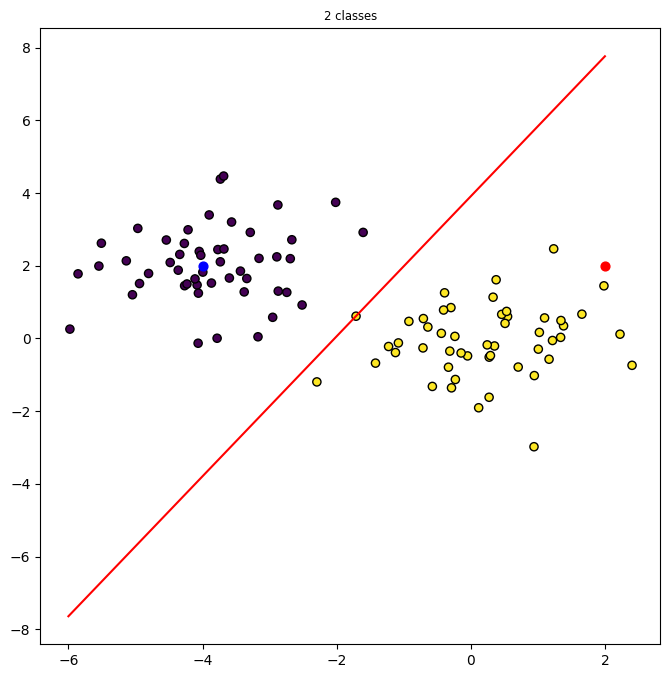

In [5]:
print('prediction A :')
print(model.predict(A))
print('prédiction B :')
print(model.predict(B))

plt.figure(figsize=(8, 8))
#plt.subplots_adjust(bottom=0.05, top=0.9, left=0.05, right=0.95)

ax =plt.subplot(111)
plt.title("2 classes", fontsize="small")

#print(A)
plt.scatter(X1[:, 0], X1[:, 1], marker="o",c=Y1, s=35, edgecolor="k")
plt.scatter(A[0][0], A[0][1], marker="o",c='red', s=40, edgecolor="red")
plt.scatter(B[0][0], B[0][1], marker="o",c='blue', s=40, edgecolor="blue")

#Prédire les nombres
liste_x= np.linspace(-6,2, num =50)
xe = np.array([[x] for x in liste_x])
Ylim = (-xe*1.0792954 - 2.191928)/(-0.56038827)

plt.plot(xe,Ylim,color = 'r')
#model.summary()
plt.show()


# Visualisons l'évolution des erreurs et de la précision du modèle sur les données d'entrainement

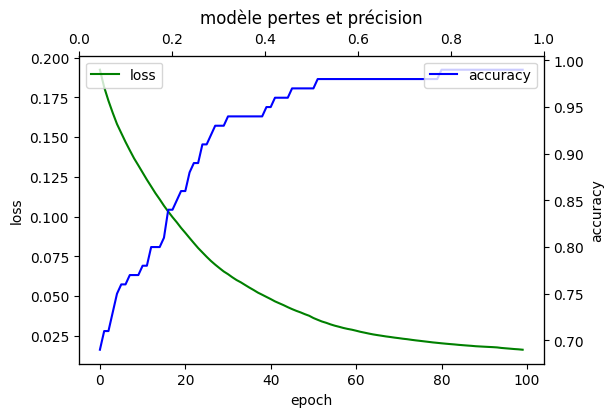

In [6]:

# Représentation d'un nuage de points

fig, ax1 = plt.subplots(figsize=(6, 4))
ax2 = ax1.twiny()

plt.title('modèle pertes et précision')
ax1.plot(hist.history['loss'], 'g-', label = 'loss')
ax1.set_ylabel('loss')
ax1.set_xlabel('epoch')
ax1.legend(loc='upper left')
ax2 = ax1.twinx()

ax2.plot(hist.history['accuracy'], 'b-', label ='accuracy')
ax2.set_ylabel('accuracy')
ax2.legend(loc='upper right')
plt.show()

# Exemple avec 3 classes ...

* Combien de neurones doit comporter la couche d'entrée pour obtenir un résultat convenable ?
Essayer de modifier le nombre de neurones de la couche d'entrée....
La couche de sortie doit comporter obligatoirement 3 neurones car on utilise la fonction d'activation softmax et il y a 3 classes

y_true :
[2 2 0 ... 0 2 1]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
prediction A :
[0.00,1.00,0.00]
prédiction B :
[0.00,0.00,1.00]
prédiction C :
[0.86,0.00,0.14]


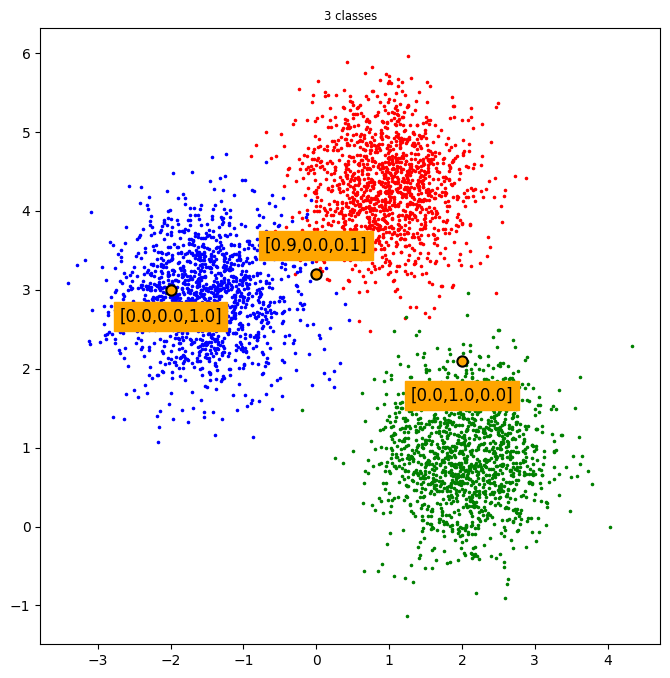

In [7]:
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Activation, Dense
from keras import initializers
from keras.optimizers import SGD, Adam
from keras.utils import to_categorical
import numpy as np
#from sklearn.cluster import kmeans_plusplus
from sklearn.datasets import make_blobs

# Generate sample data
n_samples = 4000
n_components = 3

X, y_true = make_blobs(
    n_samples=n_samples, centers=n_components, cluster_std=0.60, random_state=0
)

print('y_true :')
print(y_true)
#my_init = initializers.Zeros()
my_init = initializers.Ones()
#my_init = initializers.RandomUniform(minval=0.0, maxval=1.0)

model=Sequential()
#pour La couche d'entrée, input_shape vaut : 2  (car on a 2 features: x et y), pas de normalisation nécessaire
model.add(Dense(units=128,input_shape=[2],activation= 'relu',kernel_initializer = my_init))
#La couche de sortie, units vaut 3 mais activation softmax
model.add(Dense(units=3, activation='softmax'))

#Optimisation du réseau ("adam "alternatif à "sgd")
#opt = SGD(lr=0.01) #w = w - learning_rate * g
opt = Adam(learning_rate=0.01)
hist = model.compile(loss='categorical_crossentropy',optimizer=opt,  metrics=['accuracy'])
# entrée de dimension 2 (x, y)
entree = X
# y_true de dimension  3 (3 classes)
sortie = to_categorical(y_true) #Converts a class vector (integers) to binary class matrix.
# 0 >  0 0 0
# 1 >  1 0 0    vecteur (y_true) > matrice binaire (sortie)
# 2 >  0 1 0


#Entraînement du réseau ? passages
model.fit(x=entree,y=sortie,epochs=20,verbose =0)

#Print weights
#print("")
#print("Weights: \n")
#print(model.get_weights())

#Prediction
A= np.array([[2,2.1]])
B= np.array([[-2,3]])
C= np.array([[0,3.2]])
Apred = model.predict(A)
Bpred = model.predict(B)
Cpred = model.predict(C)

#Affichage des prédictions
#print(model.predict(B))
#print(A[0][1])

print('prediction A :')
print(f"[{Apred[0][0]:.2f},{Apred[0][1]:.2f},{Apred[0][2]:.2f}]")

print('prédiction B :')
print(f"[{Bpred[0][0]:.2f},{Bpred[0][1]:.2f},{Bpred[0][2]:.2f}]")

print('prédiction C :')
print(f"[{Cpred[0][0]:.2f},{Cpred[0][1]:.2f},{Cpred[0][2]:.2f}]")

# Tracés des points avec les prédistions pour A, B et C
plt.figure(figsize=(8, 8))
plt.subplot(111)

#colors = ["#4EACC5", "#FF9C34", "#4E9A06"]
colors = ["red", "green", "blue"]

for k, col in enumerate(colors):# k index , col couleur
    cluster_data = (y_true == k)# cluster succession de valeurs vraies ou fausses
    plt.scatter(X[cluster_data, 0], X[cluster_data, 1], c=col, marker=".", s=10)# X[cluster_data, 0] prend les valeurs X[i,0] pour lesquelles cluster_data[i]=True
plt.scatter(A[0][0], A[0][1], marker="o",c='orange', s=55, edgecolor="k", lw=1.5)
plt.scatter(B[0][0], B[0][1], marker="o",c='orange', s=55, edgecolor="k", lw=1.5)
plt.scatter(C[0][0], C[0][1], marker="o",c='orange', s=55, edgecolor="k", lw=1.5)
plt.text(2, 1.6, f"[{Apred[0][0]:.1f},{Apred[0][1]:.1f},{Apred[0][2]:.1f}]", fontsize = 12, backgroundcolor ='orange', ha ='center', c ='black')
plt.text(-2, 2.6, f"[{Bpred[0][0]:.1f},{Bpred[0][1]:.1f},{Bpred[0][2]:.1f}]", fontsize = 12, backgroundcolor ='orange', ha ='center', c ='black')
plt.text(0, 3.5, f"[{Cpred[0][0]:.1f},{Cpred[0][1]:.1f},{Cpred[0][2]:.1f}]", fontsize = 12, backgroundcolor ='orange', ha ='center', c ='black')

plt.title("3 classes", fontsize="small")
plt.show()


# Traçons les différents domaines ....

1250/1250 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


(<Figure size 600x600 with 1 Axes>,
 <Axes: title={'center': 'Domaines de décision ...'}>)

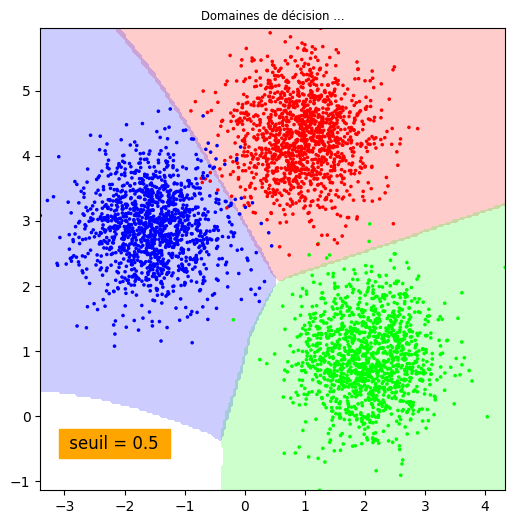

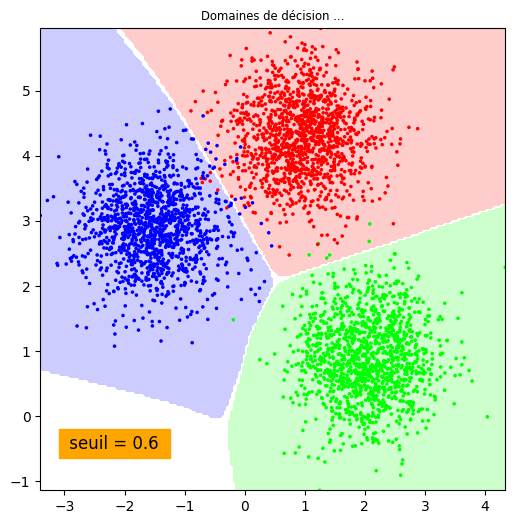

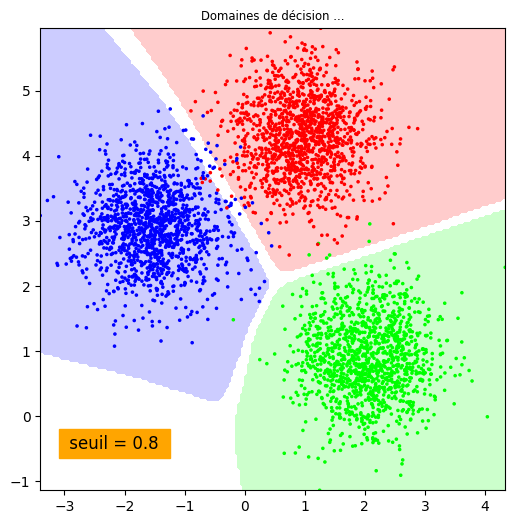

In [8]:
import matplotlib as mpl
def plot_decision_boundary2(X, y, model, steps=200,alpha=0.2,seuil=0.45):
    """
    Function to plot the decision boundary and data points of a model.
    Data points are colored based on their actual label.
    """
    #alpha = alpha
    colorT = (0, 0, 0.0,0.0)# tranparent
    color2 = [(1, 0, 0,alpha),(0, 1, 0,alpha),(0, 0, 1,alpha)]
    def C_map(coul):
        cmap = (mpl.colors.ListedColormap([colorT, coul]))
        return cmap

    # Define region of interest by data limits
    xmin, xmax = X[:,0].min(), X[:,0].max()
    ymin, ymax = X[:,1].min(), X[:,1].max()
    x_span = np.linspace(xmin, xmax, steps)
    y_span = np.linspace(ymin, ymax, steps)
    xx, yy = np.meshgrid(x_span, y_span)

    # Make predictions across region of interest
    labels = model.predict(np.c_[xx.ravel(), yy.ravel()])
    fig = plt.figure(figsize=(6, 6))
    ax =plt.subplot(111)

    for i in range(0,3):
        # Plot decision boundary in region of interest
        z = labels[:,i].reshape(xx.shape)
        z = z > seuil #(seuil Threshold value)
        ax.contourf(xx, yy, z, cmap=C_map(color2[i]))
    plt.text(-3, -0.5, f" seuil = {seuil:.1f} ", fontsize = 12, backgroundcolor ='orange', ha ='left', c ='black')
    plt.title("Domaines de décision ...", fontsize="small")
    ax.scatter(X[:,0], X[:,1], c=y, lw=1,marker=".", s=10)

    return fig, ax

plot_decision_boundary2(entree, sortie, model, alpha=0.2)
plot_decision_boundary2(entree, sortie, model, alpha=0.2,seuil = 0.6)
plot_decision_boundary2(entree, sortie, model, alpha=0.2,seuil = 0.8)